<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

 1) MAKE THE DATAFRAME DIRECTLY"

In [15]:
data = {
    "Hours":[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7],
    "Scores":[21,47,27,75,30,20,88,60,81,25,85]
}

In [14]:
df = pd.DataFrame(data)
display(df)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
X = df[['Hours','Scores']].values

2) VISUALIZE RAW DATA


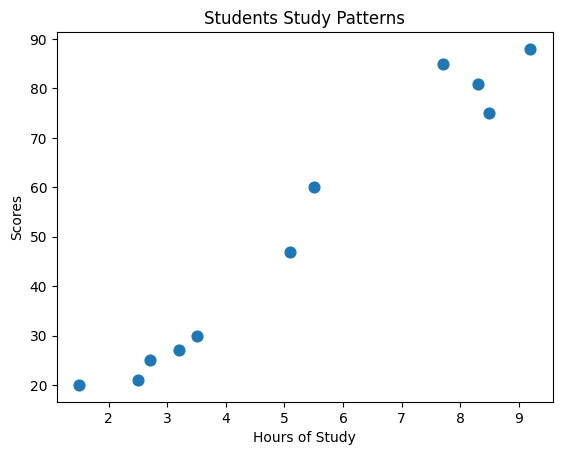

In [17]:
plt.scatter(X[:,0],X[:,1],s=60)
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.title("Students Study Patterns")
plt.show()

3) ELBOW METHOD

In [18]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

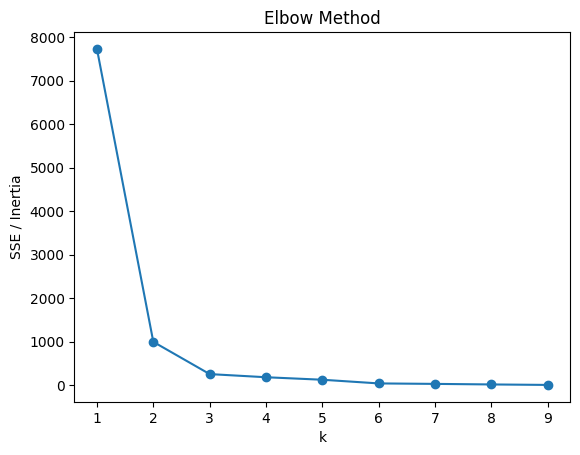

In [19]:
plt.plot(range(1,10),sse,'o-')
plt.xlabel("k")
plt.ylabel("SSE / Inertia")
plt.title("Elbow Method")
plt.show()

In [20]:
# choose best K = 2 (by observing elbow)
kmeans = KMeans(n_clusters=2, random_state=0)
y_km = kmeans.fit_predict(X)

4) VISUALIZE CLUSTERS

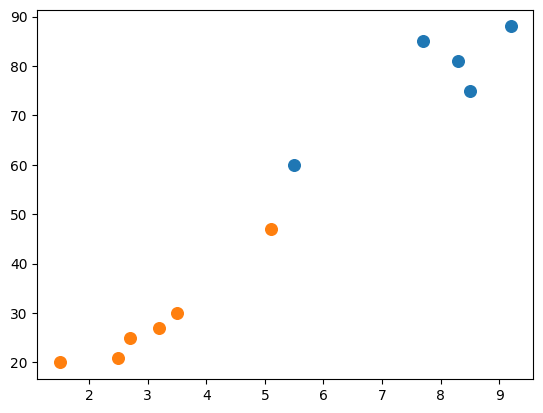

In [21]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=70,label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=70,label='Cluster 2')

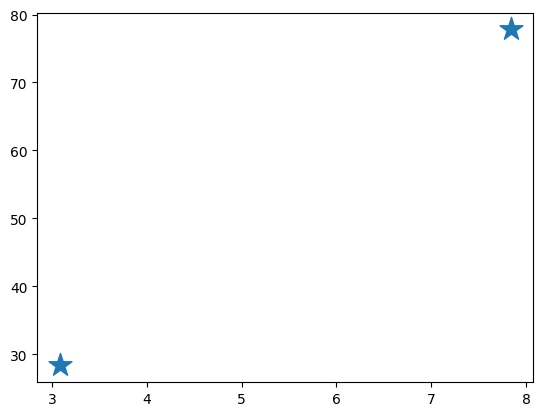

In [22]:
# centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=300,marker='*',label='Centroids')

/tmp/ipython-input-1474944221.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


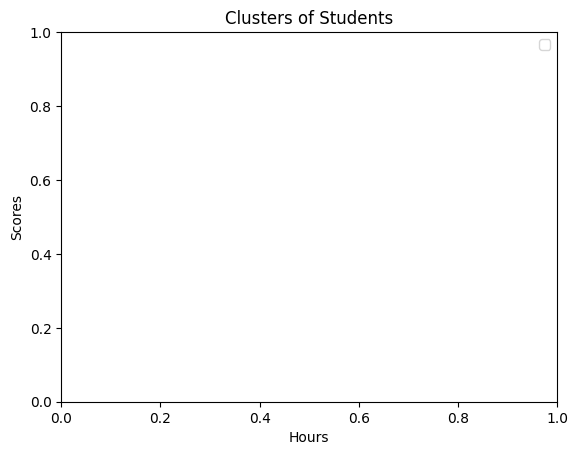

In [23]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Clusters of Students")
plt.legend()
plt.show()

In [24]:
# 5) Predict for new student
new_student = np.array([[9.25,85]])
pred = kmeans.predict(new_student)

In [25]:
print("Cluster for new student (9.25 hr, 85 score) =", pred[0])

Cluster for new student (9.25 hr, 85 score) = 0
